# Importing Basic Dependencies

In [266]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [267]:
import sklearn
sklearn.__version__


'1.1.2'

In [268]:
df = pd.read_csv('laptop_data_new.csv')
df.head()

,Manufacturer,TypeName,Inches,ScreenResolution,CPU,RAM,Storage,GPU,OpSys,Weight,Price
0,Apple,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,"1339,69"
1,Apple,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,"898,94"
2,HP,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,"575,00"
3,Apple,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,"2537,45"
4,Apple,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,"1803,60"


In [269]:
df.columns

Index(['Manufacturer', 'TypeName', 'Inches', 'ScreenResolution', 'CPU', 'RAM',
       'Storage', 'GPU', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [270]:


df = df[['Manufacturer', 'TypeName', 'Inches', 'ScreenResolution',
       'CPU', 'RAM', 'Storage', 'GPU', 'OpSys', 'Weight', 'Price']]
df.head()

,Manufacturer,TypeName,Inches,ScreenResolution,CPU,RAM,Storage,GPU,OpSys,Weight,Price
0,Apple,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,"1339,69"
1,Apple,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,"898,94"
2,HP,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,"575,00"
3,Apple,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,"2537,45"
4,Apple,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,"1803,60"


In [271]:
df.isnull().sum()

Manufacturer        0
TypeName            0
Inches              0
ScreenResolution    0
CPU                 0
RAM                 0
Storage             0
GPU                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [272]:
# checking for duplicated rows

df.duplicated().sum()

30

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Manufacturer      1303 non-null   object
 1   TypeName          1303 non-null   object
 2   Inches            1303 non-null   object
 3   ScreenResolution  1303 non-null   object
 4   CPU               1303 non-null   object
 5   RAM               1303 non-null   object
 6   Storage           1303 non-null   object
 7   GPU               1303 non-null   object
 8   OpSys             1303 non-null   object
 9   Weight            1303 non-null   object
 10  Price             1303 non-null   object
dtypes: object(11)
memory usage: 112.1+ KB


In [274]:
catvars = df.select_dtypes(include=['object']).columns
numvars = df.select_dtypes(include = ['int32','int64','float32','float64']).columns

catvars,numvars

(Index(['Manufacturer', 'TypeName', 'Inches', 'ScreenResolution', 'CPU', 'RAM',
        'Storage', 'GPU', 'OpSys', 'Weight', 'Price'],
       dtype='object'),
 Index([], dtype='object'))

In [275]:
def uniquevals(col):
    print(f'Details of the particular col {col} is : {df[col].unique()}')
    
def valuecounts(col):
    print(f'Valuecounts of the particular col {col} is : {df[col].value_counts()}')
    
    
    
    
for col in df.columns:
    uniquevals(col)
    print("-"*75)

Details of the particular col Manufacturer is : ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
---------------------------------------------------------------------------
Details of the particular col TypeName is : ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
---------------------------------------------------------------------------
Details of the particular col Inches is : ['13.3"' '15.6"' '15.4"' '14.0"' '12.0"' '11.6"' '17.3"' '10.1"' '13.5"'
 '12.5"' '13.0"' '18.4"' '13.9"' '12.3"' '17.0"' '15.0"' '14.1"' '11.3"']
---------------------------------------------------------------------------
Details of the particular col ScreenResolution is : ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel 

In [276]:
'''
so on observation we can see that if we remove "GB" from RAM,i can 
make it as an integer value then after,now same goes with Memory as 
well as Weight,for Weight i can classify it as floating variable
using the str.replace() as shown ↓
'''

df['RAM'] = df['RAM'].astype(str).str.replace('GB','')
df['Weight'] = df['Weight'].astype(str).str.replace('kg','')
df['Weight'] = df['Weight'].astype(str).str.replace('s','')

# converting from string->integer for ram column

df['RAM'] = df['RAM'].astype('int32')

# converting from string-> float for the weight column

df['Weight'] = df['Weight'].astype('float32')

df.head()

,Manufacturer,TypeName,Inches,ScreenResolution,CPU,RAM,Storage,GPU,OpSys,Weight,Price
0,Apple,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,"1339,69"
1,Apple,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,"898,94"
2,HP,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,"575,00"
3,Apple,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,"2537,45"
4,Apple,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,"1803,60"


In [277]:
df['Price'] = df['Price'].astype(str).str.replace(',','.').astype('float')

df.head()

,Manufacturer,TypeName,Inches,ScreenResolution,CPU,RAM,Storage,GPU,OpSys,Weight,Price
0,Apple,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   object 
 3   ScreenResolution  1303 non-null   object 
 4   CPU               1303 non-null   object 
 5   RAM               1303 non-null   int32  
 6   Storage           1303 non-null   object 
 7   GPU               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(1), int32(1), object(8)
memory usage: 101.9+ KB


# Exploratory Data Analysis

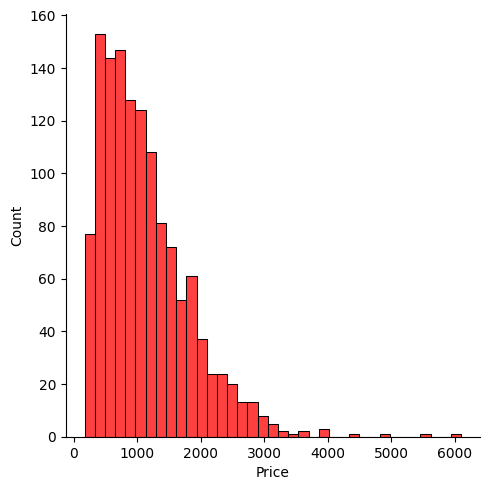

In [279]:
# viewing the distribution of the price column

sn.displot(df['Price'],color='red')

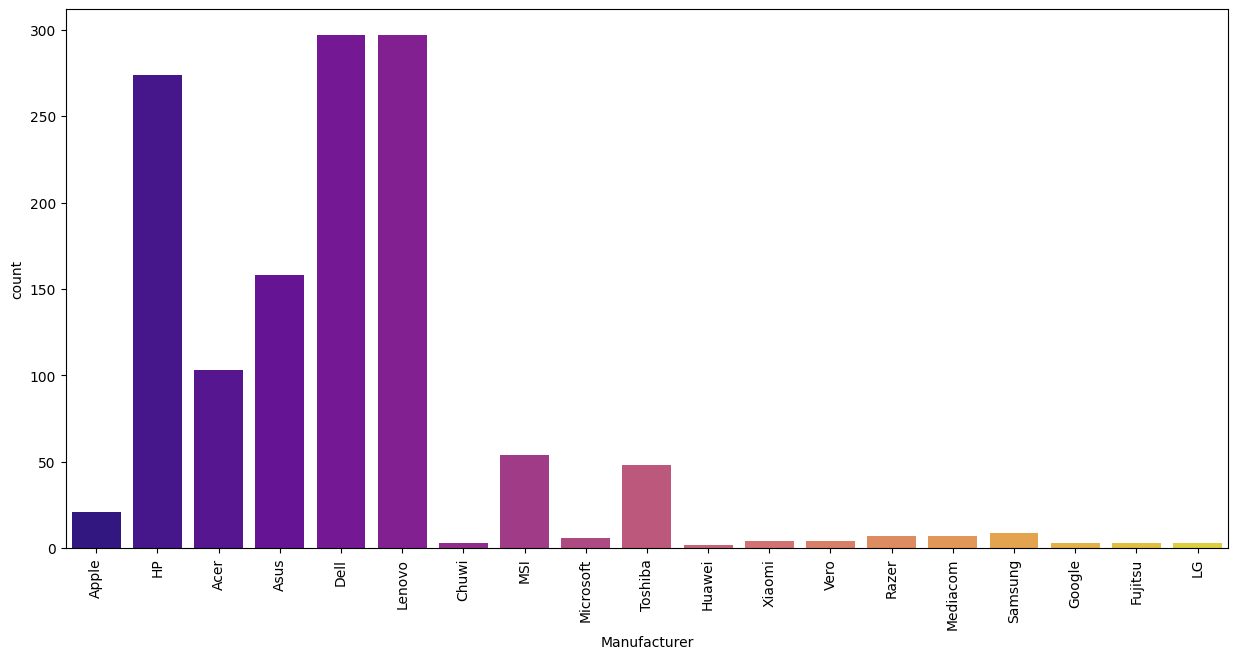

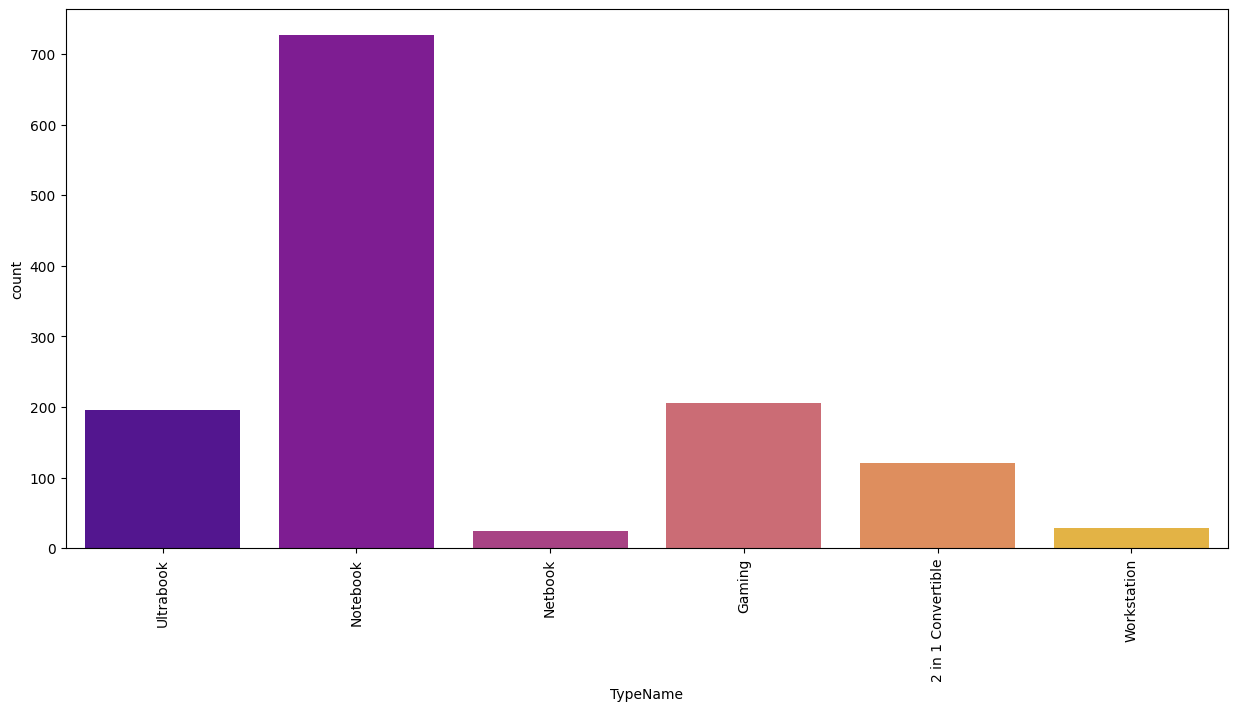

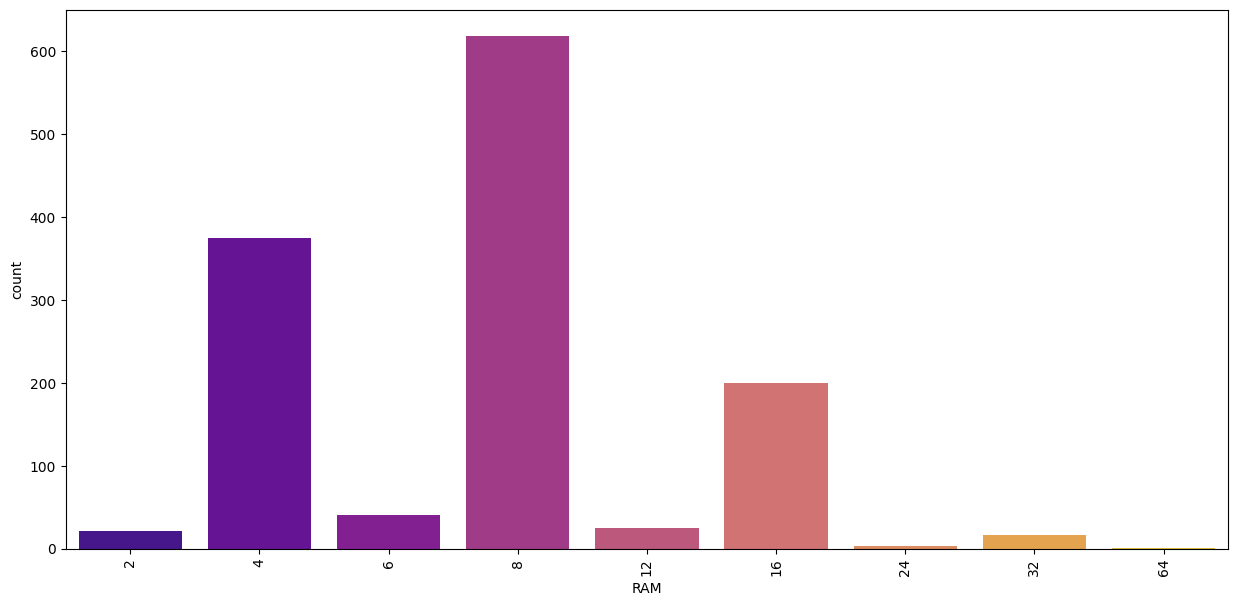

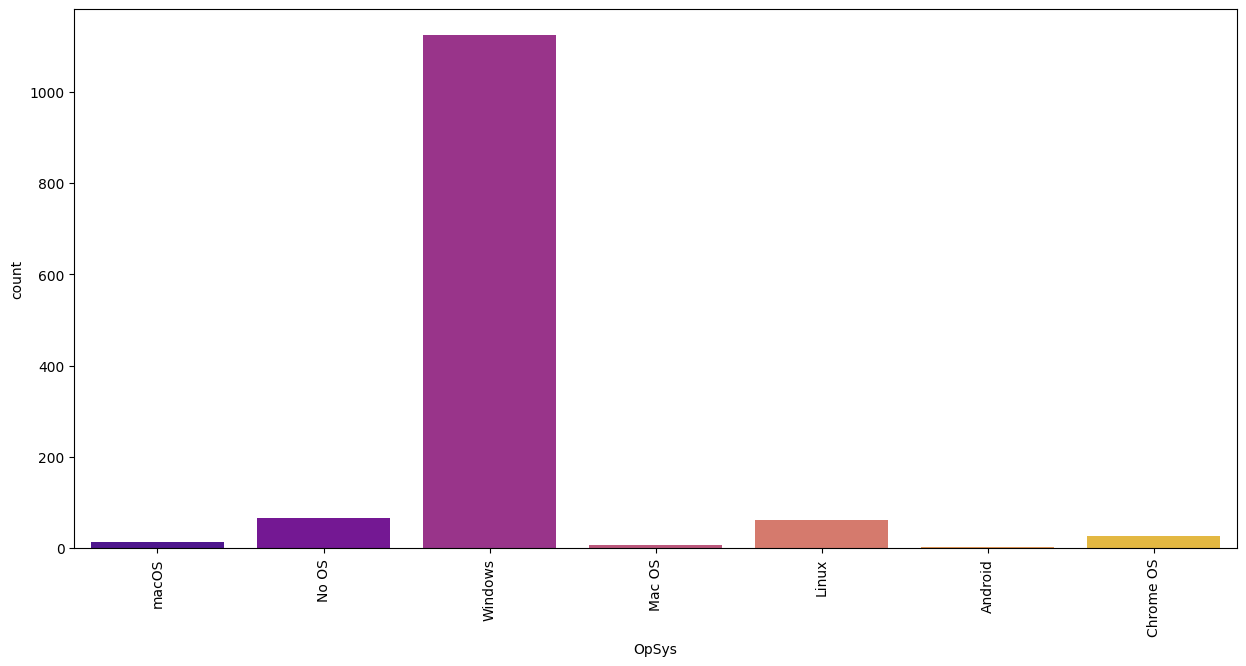

In [280]:
## plotting countplots for the categorical variables

def drawplot(col):
    plt.figure(figsize=(15,7))
    sn.countplot(x=df[col],palette='plasma')
    plt.xticks(rotation='vertical')
    
toview = ['Manufacturer', 'TypeName','RAM','OpSys']
for col in toview:
    drawplot(col)

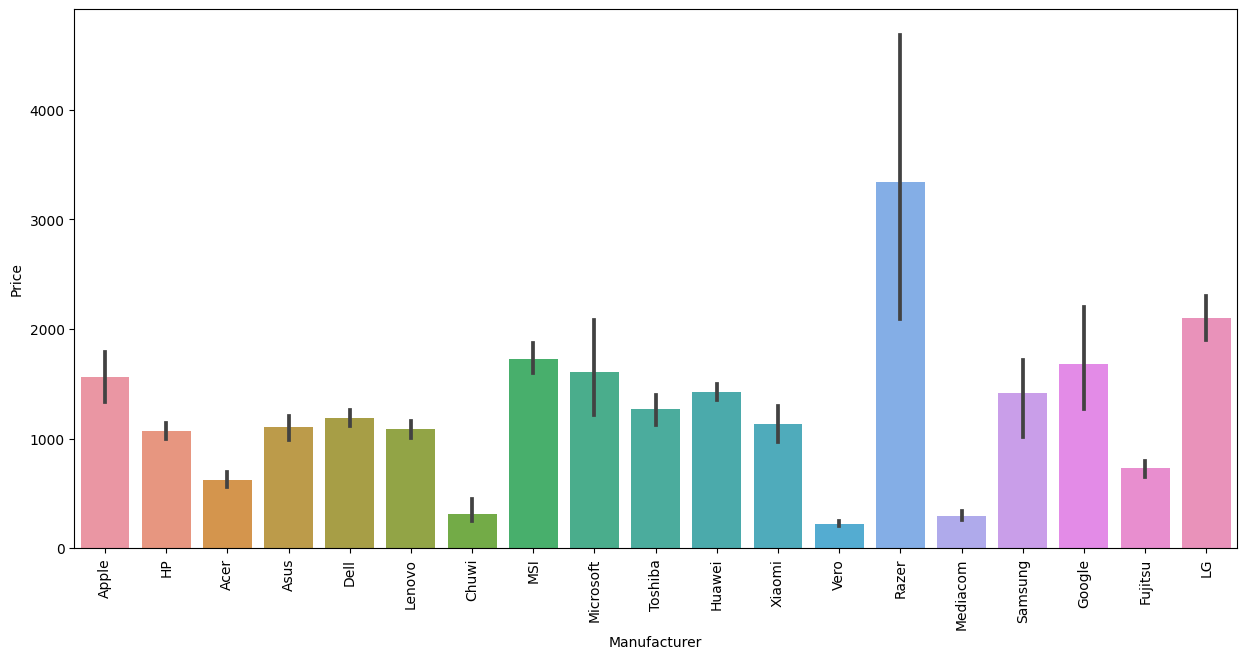

In [281]:
# average price for each of the laptop brands
# this will say us the insight that as per company the price of the laptop vary


plt.figure(figsize=(15,7))
sn.barplot(x = df['Manufacturer'],y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

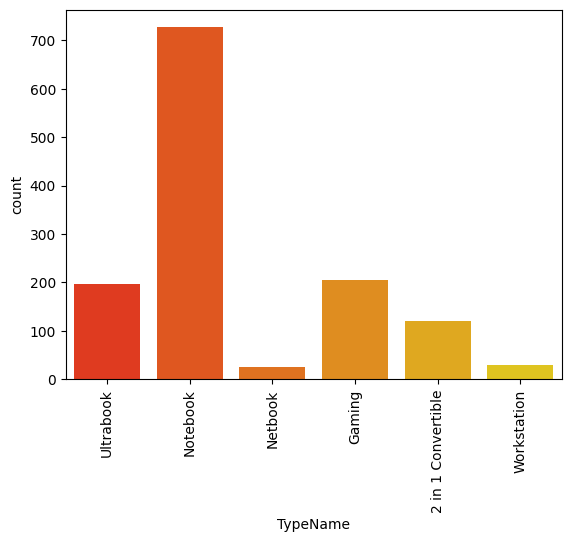

In [282]:
## various types of laptops

sn.countplot(x=df['TypeName'],palette='autumn')
plt.xticks(rotation = 'vertical')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

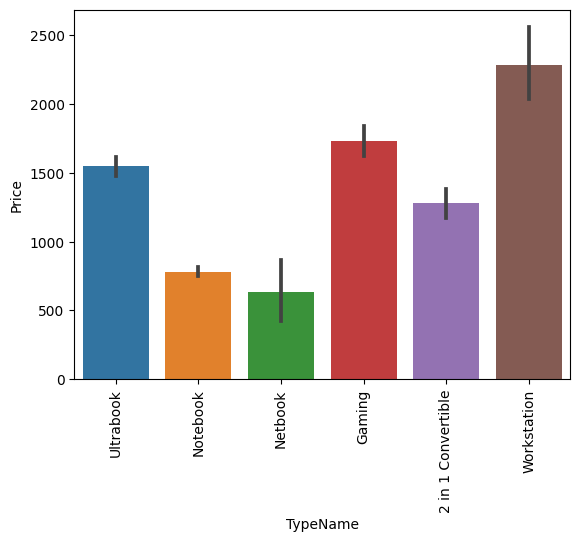

In [283]:
# laptop type and variation about the price 

sn.barplot(x = df['TypeName'],y = df['Price'])
plt.xticks(rotation = 'vertical')



<AxesSubplot: xlabel='Inches', ylabel='Price'>

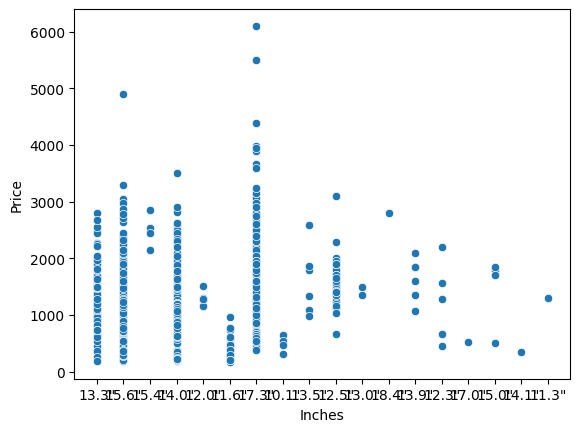

In [284]:
# variation of inches towards the price

sn.scatterplot(x = df['Inches'],y = df['Price'])

**For the `Screen Resolution` column we have many types of Screen Resolutions out there as shown `Touch Screen` and `Normal` and `IPS Panel` are the 3 parts on basis of which we can segregate the things**

In [285]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [286]:
# creating a new col,touchscreen if the value is 1 that laptop is touch screen

df['TouchScreen'] = df['ScreenResolution'].apply(lambda element:1 
                                                      if 'Touchscreen' in element else 0)

df.head()

,Manufacturer,TypeName,Inches,ScreenResolution,CPU,RAM,Storage,GPU,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0
1,Apple,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0
2,HP,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0
3,Apple,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0
4,Apple,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0


In [287]:
df.sample(5)

,Manufacturer,TypeName,Inches,ScreenResolution,CPU,RAM,Storage,GPU,OpSys,Weight,Price,TouchScreen
1074,Lenovo,Ultrabook,"12.5""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows,1.30,1713.49,1
196,Razer,Gaming,"17.3""",4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32,1TB SSD,Nvidia GeForce GTX 1080,Windows,3.49,6099.00,1
1073,HP,Notebook,"13.3""",Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows,1.49,1090.00,0
739,Acer,Notebook,"15.6""",1366x768,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,Windows,2.40,410.80,0
1048,Lenovo,Gaming,"17.3""",IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 980M,Windows,4.60,2289.99,0


<AxesSubplot: xlabel='TouchScreen', ylabel='count'>

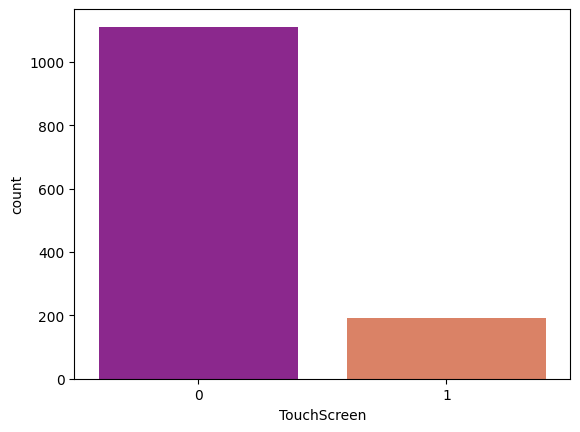

In [288]:
sn.countplot(x=df['TouchScreen'],palette='plasma')

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

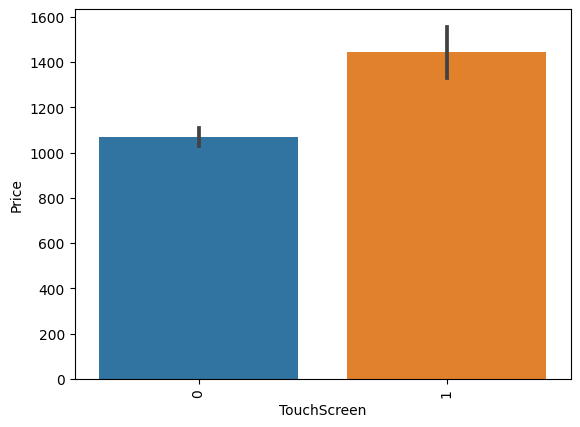

In [289]:
# touch screen on comparision with price of laptop

sn.barplot(x = df['TouchScreen'],y = df['Price'])
plt.xticks(rotation = 'vertical')

In [290]:
# creating a new col named IPS,does the laptop have IPS facility or not

df['IPS'] = df['ScreenResolution'].apply(
    lambda element:1 if "IPS" in element else 0
)
df.sample(5)

,Manufacturer,TypeName,Inches,ScreenResolution,CPU,RAM,Storage,GPU,OpSys,Weight,Price,TouchScreen,IPS
824,Lenovo,Ultrabook,"14.0""",IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB Flash Storage,Intel HD Graphics 620,Windows,1.13,1875.0,0,1
573,Lenovo,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows,2.30,830.0,0,0
515,Asus,Netbook,"11.6""",1366x768,Intel Celeron Dual Core N3350 1.1GHz,2,32GB Flash Storage,Intel HD Graphics 500,Windows,1.10,245.0,0,0
832,Asus,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,1TB HDD,Nvidia GeForce 920,Linux,2.10,519.0,0,0
1061,Asus,Gaming,"17.3""",IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,1TB HDD,Nvidia GeForce GTX 965M,No OS,4.00,998.0,0,1


<AxesSubplot: ylabel='count'>

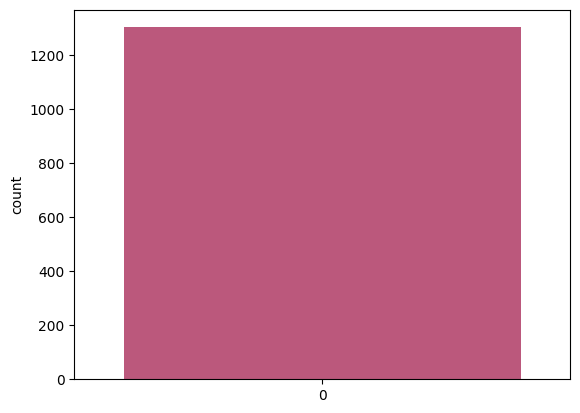

In [291]:
sn.countplot(df['IPS'],palette='plasma')

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

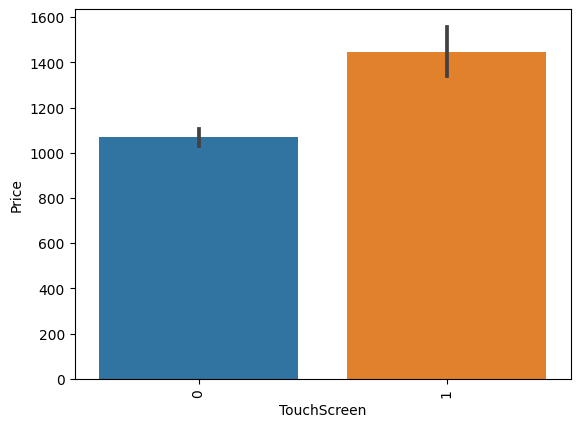

In [292]:
# price variation with respect to the IPS col

sn.barplot(x = df['TouchScreen'],y = df['Price'])
plt.xticks(rotation = 'vertical')

### Extracting the X Resolution and the Y Resolution

In [293]:


splitdf = df['ScreenResolution'].str.split('x',n = 1,expand=True)
splitdf.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [294]:
splitdf = df['ScreenResolution'].str.split('x',n = 1,expand=True)

df['X_res'] = splitdf[0]
df['Y_res'] = splitdf[1]
df.head()

,Manufacturer,TypeName,Inches,ScreenResolution,CPU,RAM,Storage,GPU,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,HP,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,Full HD 1920,1080
3,Apple,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,IPS Panel Retina Display 2560,1600


In [295]:


df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

df.head()

,Manufacturer,TypeName,Inches,ScreenResolution,CPU,RAM,Storage,GPU,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600
1,Apple,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,HP,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080
3,Apple,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800
4,Apple,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600


In [296]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   object 
 3   ScreenResolution  1303 non-null   object 
 4   CPU               1303 non-null   object 
 5   RAM               1303 non-null   int32  
 6   Storage           1303 non-null   object 
 7   GPU               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(1), int32(3), int64(2), object(8)
memory usage: 132.5+ KB


C:\Users\PREDATOR\AppData\Local\Temp\ipykernel_19652\4032489201.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(),annot=True,cmap='plasma')


<AxesSubplot: >

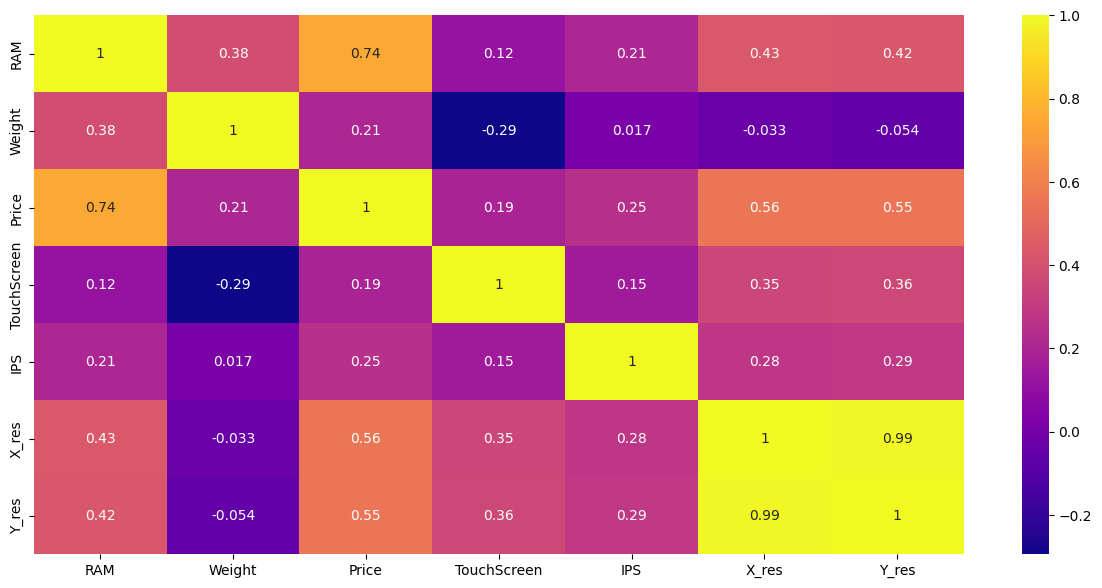

In [297]:
plt.figure(figsize=(15,7))
sn.heatmap(df.corr(),annot=True,cmap='plasma')

In [299]:
df.corr()['Price']

C:\Users\PREDATOR\AppData\Local\Temp\ipykernel_19652\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


RAM            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

**From the correlation plot we observed that as the X_res and Y_res is increasing,the price of the laptop is also increasing,so `X_res and Y_res` are positively correlated and they are giving much information,so that is the reason why i had splitted `Resolution` column into `X_res and Y_res` columns respectively**

**So to make things good,we can create a new column named `PPI{pixels per inch}`,now  as we saw from the correlation plot that the `X_res and Y_res` are having much collinearity,so why not combine them with `Inches` which is having less collinearity,so we will combine them as follows ↓,so here is the formula of how to calculate `PPI` {pixels per inch}**

$$
    PPI(pixels per inch) = \frac{\sqrt{X_resolution^2+Y_resolution^2}}{inches}
$$

In [306]:
df['Inches'] = df['Inches'].astype(str).str.replace('"',"").astype(float)
df.head()

,Manufacturer,TypeName,Inches,ScreenResolution,CPU,RAM,Storage,GPU,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600,226.983005


In [307]:
df['PPI'] = (((df['X_res']**2+df['Y_res']**2))**0.5/df['Inches']).astype('float')
df.head()

,Manufacturer,TypeName,Inches,ScreenResolution,CPU,RAM,Storage,GPU,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600,226.983005


In [308]:
df.corr()['Price']

C:\Users\PREDATOR\AppData\Local\Temp\ipykernel_19652\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.068197
RAM            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
PPI            0.473487
Name: Price, dtype: float64

**So as we observe from the correlation data that the `PPI` is having good correlation,so we will be using that,as that is a combination of 3 features and that gives collective results of 3 columns,so we will drop `Inches,X_res,Y_res` as well**

In [309]:
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)
df.head()

,Manufacturer,TypeName,CPU,RAM,Storage,GPU,OpSys,Weight,Price,TouchScreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005


**Now we will work on `CPU` column,as that also has much text data and we need to process it efficiently as we may get good insights from them**

In [310]:
df['CPU'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: CPU, Length: 118, dtype: int64

**Most common processors are made by intel right,so we will be clustering their `processors` into different categories like `i5,i7,other`,now other means the processors of intel which do not have i3,i5 or i7 attached to it,they're completely different so that's the reason i will clutter them into `other` and other category is `AMD` which is a different category in whole**

**So if we observe we need to extract the first 3 words of the CPU column,as the first 3 words of every row under the CPU col is the type of the CPU,so we will be using them as shown ↓**

In [311]:
df['CPU_name'] = df['CPU'].apply(lambda text:" ".join(text.split()[:3]))
df.head()


,Manufacturer,TypeName,CPU,RAM,Storage,GPU,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5


In [312]:

def processortype(text):
    
    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text
    
    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'
        
        else:
            return 'AMD Processor'
        
    
    
df['CPU_name'] = df['CPU_name'].apply(lambda text:processortype(text))
df.head()

,Manufacturer,TypeName,CPU,RAM,Storage,GPU,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processor')])

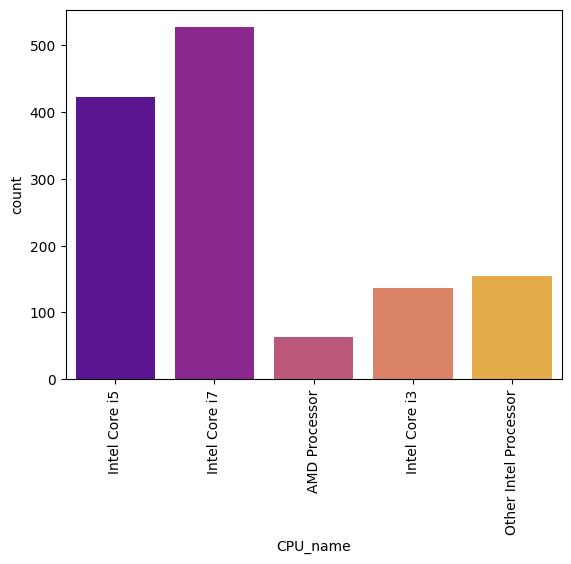

In [313]:
sn.countplot(x=df['CPU_name'],palette='plasma')
plt.xticks(rotation = 'vertical')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processor')])

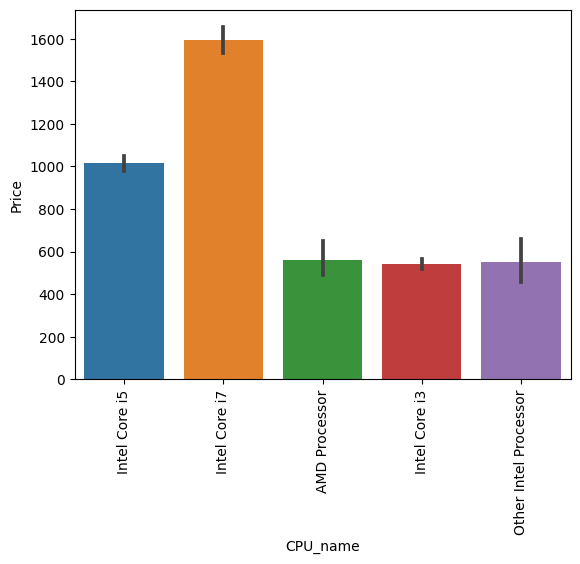

In [314]:
# price vs processor variation

sn.barplot(x=df['CPU_name'],y=df['Price'])
plt.xticks(rotation = 'vertical')

In [315]:
## dropping the cpu column

df.drop(columns=['CPU'],inplace=True)
df.head()

,Manufacturer,TypeName,RAM,Storage,GPU,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5


##### Analysis on the RAM column

<AxesSubplot: xlabel='RAM', ylabel='count'>

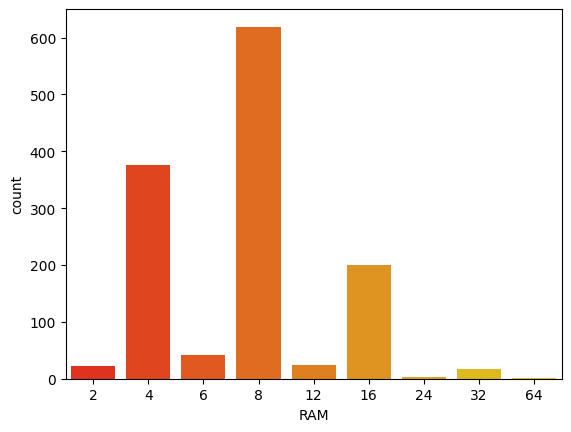

In [316]:
sn.countplot(x=df['RAM'],palette='autumn')

<AxesSubplot: xlabel='RAM', ylabel='Price'>

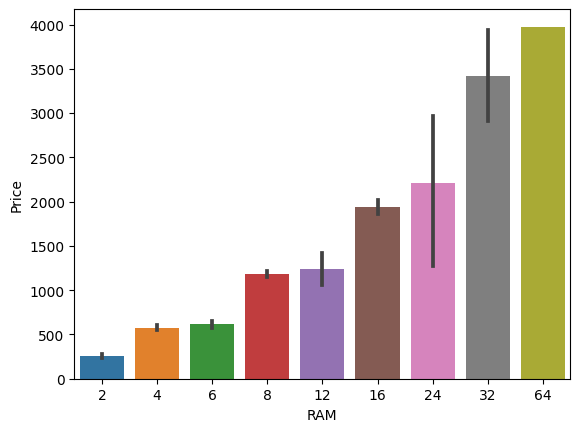

In [317]:
## ram is having good relation with price

sn.barplot(x=df['RAM'],y=df['Price'])

##### About the memory column

In [318]:
df['Storage'].iloc[:1][0]

'128GB SSD'

In [319]:
# we have different categories and also different kinds of variations 

df['Storage'].value_counts()

256GB SSD                        412
1TB HDD                          224
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1TB Hybrid                         9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
1GB SSD                            5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [320]:


df['Storage'] = df['Storage'].astype(str).replace('\.0','',regex = True)

# replace the GB word with " "

df['Storage'] = df['Storage'].str.replace('GB','')

# replace the TB word with "000"

df['Storage'] = df['Storage'].str.replace('TB','000')

# split the word accross the "+" character

newdf = df['Storage'].str.split("+",n = 1,expand = True)

newdf

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [321]:
df['first'] = newdf[0]
df['first'] = df['first'].str.strip()
df.head()

,Manufacturer,TypeName,RAM,Storage,GPU,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,256 SSD


In [322]:
def applychanges(value):
    
    df['Layer1'+value] = df['first'].apply(lambda x:1 if value in x else 0)
    
    
listtoapply = ['HDD','SSD','Hybrid','FlashStorage']    
for value in listtoapply:
    applychanges(value)
    
    
df.head()

,Manufacturer,TypeName,RAM,Storage,GPU,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,256 SSD,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,256 SSD,0,1,0,0


In [323]:
# removing all the characters just keep the numbers

df['first'] = df['first'].str.replace(r'\D','')
df['first'].value_counts()

C:\Users\PREDATOR\AppData\Local\Temp\ipykernel_19652\3128540781.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D','')


256     508
1000    250
128     177
512     140
500     132
32       45
64       17
2000     16
16       10
1         5
240       1
8         1
508       1
Name: first, dtype: int64

In [324]:
df['Second'] = newdf[1]
df.head()

,Manufacturer,TypeName,RAM,Storage,GPU,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,128,0,1,0,0,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,128,0,0,0,0,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,256,0,1,0,0,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,512,0,1,0,0,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,256,0,1,0,0,None


In [325]:
def applychanges1(value):
    
    df['Layer2'+value] = df['Second'].apply(lambda x:1 if value in x else 0)
    
    
listtoapply1 = ['HDD','SSD','Hybrid','FlashStorage']
df['Second'] = df['Second'].fillna("0")
for value in listtoapply1:
    applychanges1(value)
    

# remove all the characters just keep the numbers

df['Second'] = df['Second'].str.replace(r'\D','')
df['Second'].value_counts()

C:\Users\PREDATOR\AppData\Local\Temp\ipykernel_19652\2034917926.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Second'] = df['Second'].str.replace(r'\D','')


0       1095
1000     187
2000      15
256        3
500        2
512        1
Name: Second, dtype: int64

In [326]:
df['first'] = df['first'].astype('int')
df['Second'] = df['Second'].astype('int')
df.head()

,Manufacturer,TypeName,RAM,Storage,GPU,OpSys,Weight,Price,TouchScreen,IPS,...,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,...,128,0,0,0,0,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,...,256,0,1,0,0,0,0,0,0,0


In [327]:
# multiplying the elements and storing the result in subsequent columns


df["HDD"]=(df["first"]*df["Layer1HDD"]+df["Second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["Second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["Second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1FlashStorage"]+df["Second"]*df["Layer2FlashStorage"])


## dropping of uncessary columns

df.drop(columns=['first', 'Second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1FlashStorage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2FlashStorage'],inplace=True)

In [328]:
df.sample(5)

,Manufacturer,TypeName,RAM,Storage,GPU,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Hybrid,Flash_Storage
787,Lenovo,Gaming,4,1000 HDD,Nvidia GeForce GTX 1050,Windows,2.40,999.0,0,1,141.211998,Intel Core i7,1000,0,0,0
753,Lenovo,Ultrabook,4,1 SSD,Intel HD Graphics 520,Windows,1.70,1096.0,0,0,157.350512,Intel Core i5,0,1,0,0
810,HP,Gaming,12,1000 HDD,AMD Radeon RX 580,Windows,3.74,1749.0,0,1,127.335675,Intel Core i7,1000,0,0,0
947,Lenovo,Notebook,8,1000 HDD,Nvidia GeForce 920MX,No OS,2.20,685.0,0,0,141.211998,Intel Core i7,1000,0,0,0
711,Dell,Notebook,8,256 SSD,Nvidia GeForce 930MX,Linux,1.64,1089.0,0,0,157.350512,Intel Core i5,0,256,0,0


In [329]:
df.drop(columns=['Storage'],inplace=True)
df.sample(5)

,Manufacturer,TypeName,RAM,GPU,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Hybrid,Flash_Storage
379,Acer,Notebook,8,Nvidia GeForce GTX 1050,Linux,2.40,846.0,0,0,141.211998,Intel Core i7,1000,0,0,0
616,Dell,Notebook,4,AMD Radeon R5 M420,Linux,2.18,569.0,0,0,141.211998,Intel Core i5,0,128,0,0
426,Dell,Notebook,8,AMD Radeon 530,Windows,2.02,1142.4,0,0,141.211998,Intel Core i7,2000,256,0,0
885,HP,2 in 1 Convertible,4,Intel HD Graphics 620,Windows,1.28,1799.0,1,0,165.632118,Intel Core i5,0,256,0,0
1068,Dell,Gaming,16,Nvidia GeForce GTX 970M,Windows,3.21,1329.0,0,0,282.423996,Intel Core i7,1000,256,0,0


In [330]:
df.corr()['Price']

C:\Users\PREDATOR\AppData\Local\Temp\ipykernel_19652\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


RAM              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.669709
Hybrid           0.007989
Flash_Storage         NaN
Name: Price, dtype: float64

In [331]:
df.columns


Index(['Manufacturer', 'TypeName', 'RAM', 'GPU', 'OpSys', 'Weight', 'Price',
       'TouchScreen', 'IPS', 'PPI', 'CPU_name', 'HDD', 'SSD', 'Hybrid',
       'Flash_Storage'],
      dtype='object')

In [332]:
df.drop(columns = ['Hybrid','Flash_Storage'],inplace=True)
df.head()

,Manufacturer,TypeName,RAM,GPU,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256


##### Analysis on GPU

In [333]:
df['GPU'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: GPU, Length: 110, dtype: int64

In [334]:
# this is what we will be doing,extracting the brands 
a = df['GPU'].iloc[1]
print(a.split()[0])

Intel


<AxesSubplot: xlabel='GPU brand', ylabel='count'>

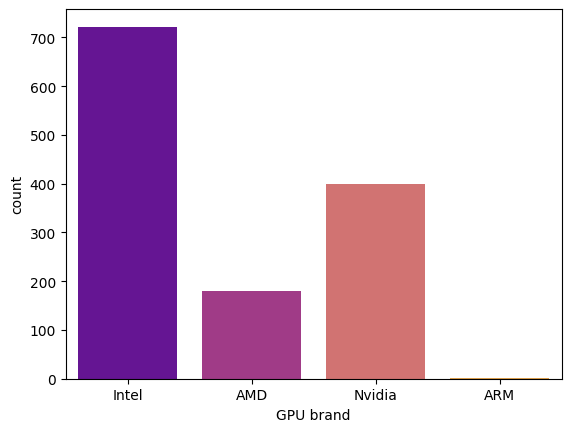

In [335]:
df['GPU brand'] = df['GPU'].apply(lambda x:x.split()[0])
sn.countplot(x=df['GPU brand'],palette='plasma')

<AxesSubplot: xlabel='GPU brand', ylabel='count'>

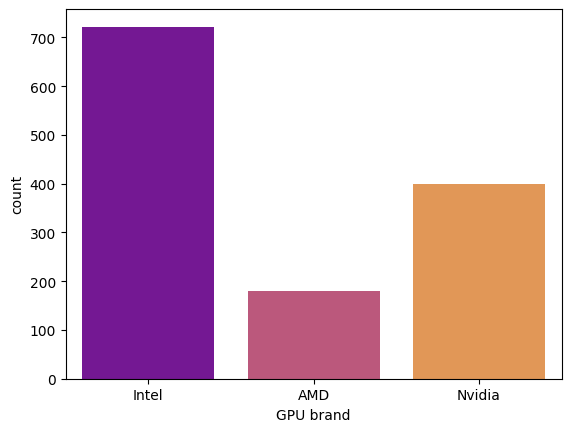

In [336]:
# removing the "ARM" tuple

df = df[df['GPU brand']!='ARM']
sn.countplot(x=df['GPU brand'],palette='plasma')

<AxesSubplot: xlabel='GPU brand', ylabel='Price'>

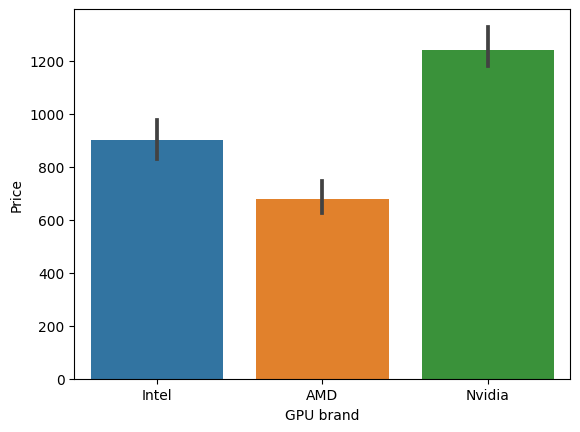

In [337]:
# price-GPU analysis,i used np.median inorder to check if there is any
# inpact of outlier or not

sn.barplot(x=df['GPU brand'],y=df['Price'],estimator=np.median)

In [338]:
df = df.drop(columns=['GPU'])
df.head()

,Manufacturer,TypeName,RAM,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,GPU brand
0,Apple,Ultrabook,8,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel


##### Operating System analysis

In [339]:
df['OpSys'].value_counts()

Windows      1125
No OS          66
Linux          62
Chrome OS      26
macOS          13
Mac OS          8
Android         2
Name: OpSys, dtype: int64

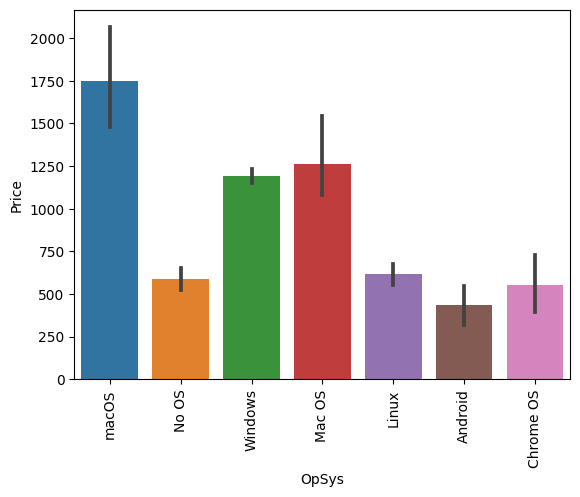

In [340]:
sn.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [341]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows', 'Mac OS', 'Linux', 'Android',
       'Chrome OS'], dtype=object)

In [342]:
# club {Windows 10,Windows 7,Windows 7 S}-->Windows
# club {macOS,mac OS X}--> mac
# else return Others

def setcategory(text):
    
    if text=='Windows':
        return 'Windows'
    
    elif text=='Mac OS' or text=='macOS':
        return 'Mac'
    
    else:
        return 'Other'
    
    
df['OpSys'] = df['OpSys'].apply(lambda x:setcategory(x))

df.head()

,Manufacturer,TypeName,RAM,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,GPU brand
0,Apple,Ultrabook,8,Mac,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel


In [343]:
df.sample(5)

,Manufacturer,TypeName,RAM,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,GPU brand
159,Toshiba,Notebook,4,Windows,2.10,447.00,0,0,100.454670,Intel Core i3,500,0,Intel
645,Lenovo,Notebook,4,Windows,1.43,274.00,0,0,111.935204,Other Intel Processor,0,0,Intel
1014,HP,Notebook,4,Windows,1.49,800.00,0,0,117.826530,Intel Core i3,500,0,Intel
551,Dell,Notebook,8,Windows,1.90,1116.99,0,0,141.211998,Intel Core i5,0,256,Intel
717,Lenovo,Notebook,4,Windows,2.19,298.00,0,0,100.454670,AMD Processor,500,0,AMD


<AxesSubplot: xlabel='OpSys', ylabel='count'>

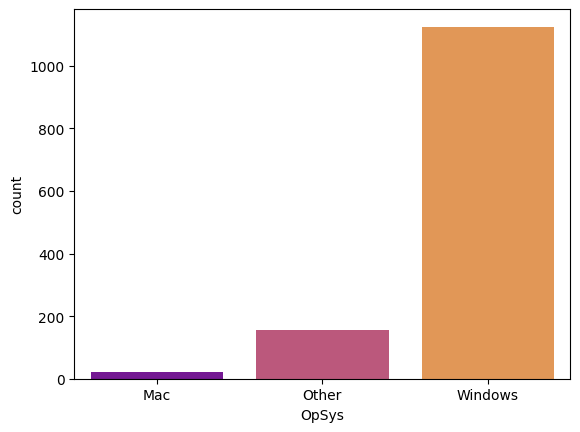

In [344]:
sn.countplot(x=df['OpSys'],palette='plasma')

(array([0, 1, 2]),
 [Text(0, 0, 'Mac'), Text(1, 0, 'Other'), Text(2, 0, 'Windows')])

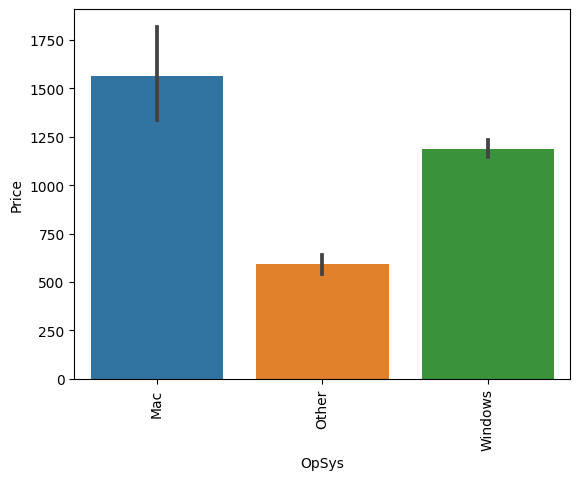

In [345]:
sn.barplot(x = df['OpSys'],y = df['Price'])
plt.xticks(rotation = 'vertical')

###### Weight analysis 

C:\Users\PREDATOR\AppData\Local\Temp\ipykernel_19652\572135600.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df['Weight'])


<AxesSubplot: xlabel='Weight', ylabel='Density'>

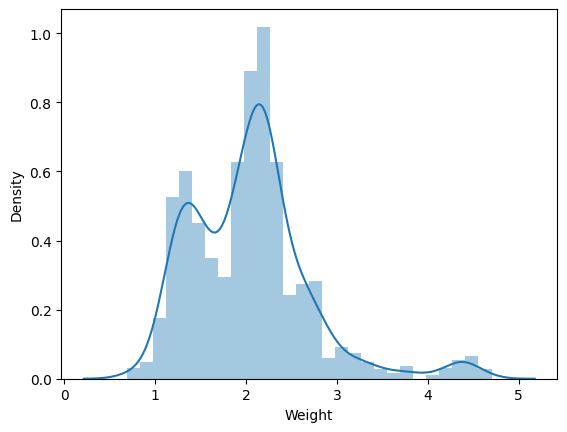

In [349]:
sn.distplot(df['Weight'])

<AxesSubplot: xlabel='Weight', ylabel='Price'>

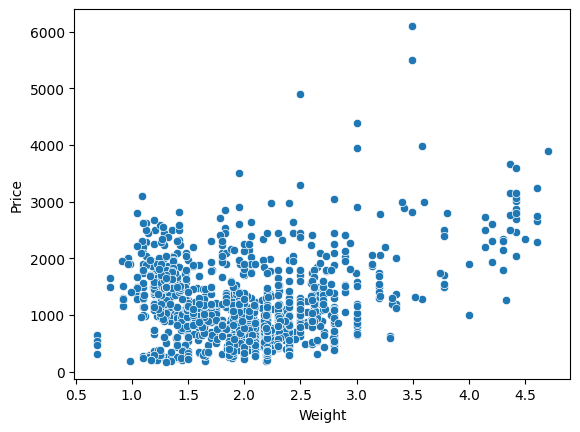

In [350]:
sn.scatterplot(x=df['Weight'],y=df['Price'])

##### Price Analysis

C:\Users\PREDATOR\AppData\Local\Temp\ipykernel_19652\2755426230.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(x=df['Price'])


<AxesSubplot: ylabel='Density'>

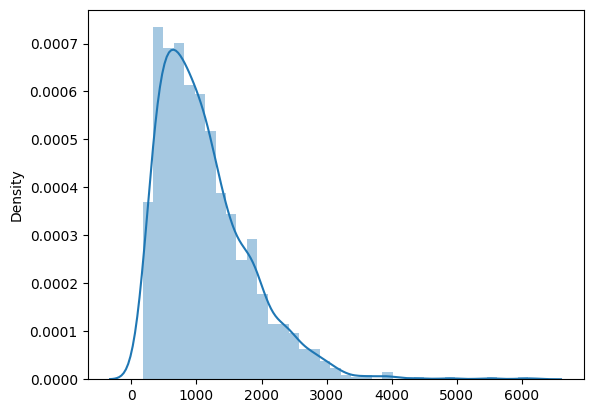

In [351]:
sn.distplot(x=df['Price'])

In [352]:
# np.log to the Price col we get a gaussian distibution

sn.distplot(y=np.log(df['Price']))

TypeError: distplot() got an unexpected keyword argument 'y'

In [353]:
## correlation with price

df.corr()['Price']

C:\Users\PREDATOR\AppData\Local\Temp\ipykernel_19652\4080605566.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


RAM            0.742905
Weight         0.209867
Price          1.000000
TouchScreen    0.192917
IPS            0.253320
PPI            0.475368
HDD           -0.096891
SSD            0.669569
Name: Price, dtype: float64

C:\Users\PREDATOR\AppData\Local\Temp\ipykernel_19652\4019273308.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(),annot=True,cmap='plasma')


<AxesSubplot: >

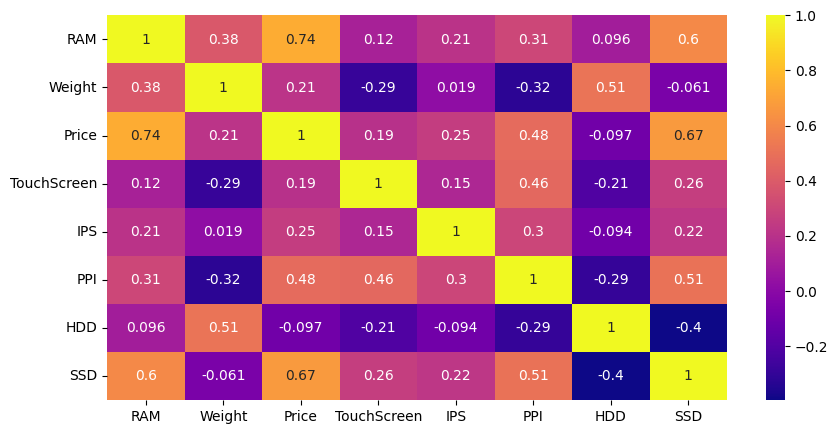

In [354]:
plt.figure(figsize=(10,5))
sn.heatmap(df.corr(),annot=True,cmap='plasma')

## Model Building

In [381]:
test = np.log(df['Price'])
train = df.drop(['Price'],axis = 1)


In [154]:
import sys
!{sys.executable} -m pip install xgboost

  Using cached xgboost-1.6.2-py3-none-win_amd64.whl (125.4 MB)


You should consider upgrading via the 'D:\Python\Laptop_Price_Predictor\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [356]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree

In [382]:
X_train, X_test, y_train, y_test = train_test_split(train,test,
                                                   test_size=0.15,random_state=2)

X_train.shape,X_test.shape

((1106, 12), (196, 12))

**There's a Class which we imported named as `Column Trasnformer` we use this widely while building our models using `Pipelines`,so for this we have to get the index numbers of the columns which are having categorical variables**

In [383]:
mapper = {i:value for i,value in enumerate(X_train.columns)}
mapper

{0: 'Manufacturer',
 1: 'TypeName',
 2: 'RAM',
 3: 'OpSys',
 4: 'Weight',
 5: 'TouchScreen',
 6: 'IPS',
 7: 'PPI',
 8: 'CPU_name',
 9: 'HDD',
 10: 'SSD',
 11: 'GPU brand'}

### Linear Regression

In [385]:
df.head()


,Manufacturer,TypeName,RAM,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,GPU brand
0,Apple,Ultrabook,8,Mac,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel


In [386]:
#appying one hot encoding on the columns with this indices-->[0,1,3,8,11]


step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8055413894666545
MAE 0.21129447388343559


In [387]:


np.exp(0.21)

1.2336780599567432

### Decision Tree

In [388]:


step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8330756973136114
MAE 0.18765964173727398


### Random Forest

In [389]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8826652312007328
MAE 0.16141586220066512


183     6.675823
1141    7.041237
1049    5.662613
1020    6.679587
878     6.816188
          ...   
466     6.150603
299     7.291656
493     6.361302
527     6.129050
1193    7.058758
Name: Price, Length: 1106, dtype: float64

In [390]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [391]:
train.head()

,Manufacturer,TypeName,RAM,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,GPU brand
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel


In [392]:
train.to_csv('traineddata.csv',index=None)

## Hyperparameter Tuning for Random Forest 

In [393]:
indexlist = [0,1,3,8,11]
transformlist = []
for key,value in mapper.items():
    if key in indexlist:
        transformlist.append(value)
        
transformlist

['Manufacturer', 'TypeName', 'OpSys', 'CPU_name', 'GPU brand']

In [394]:
train = pd.get_dummies(train,columns=transformlist,drop_first=True)
train.head()

,RAM,Weight,TouchScreen,IPS,PPI,HDD,SSD,Manufacturer_Apple,Manufacturer_Asus,Manufacturer_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,OpSys_Other,OpSys_Windows,CPU_name_Intel Core i3,CPU_name_Intel Core i5,CPU_name_Intel Core i7,CPU_name_Other Intel Processor,GPU brand_Intel,GPU brand_Nvidia
0,8,1.37,0,1,226.983005,0,128,1,0,0,...,1,0,0,0,0,1,0,0,1,0
1,8,1.34,0,0,127.677940,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,8,1.86,0,0,141.211998,0,256,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,16,1.83,0,1,220.534624,0,512,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,8,1.37,0,1,226.983005,0,256,1,0,0,...,1,0,0,0,0,1,0,0,1,0


In [395]:
X_train, X_test, y_train, y_test = train_test_split(train,test,
                                                   test_size=0.15,random_state=2)

X_train.shape,X_test.shape

((1106, 38), (196, 38))

[Text(0.4960198138206346, 0.9782608695652174, 'RAM <= 7.0\nsquared_error = 0.39\nsamples = 1106\nvalue = 6.846'),
 Text(0.23032128092952028, 0.9347826086956522, 'CPU_name_Other Intel Processor <= 0.5\nsquared_error = 0.192\nsamples = 362\nvalue = 6.234'),
 Text(0.15722380669695094, 0.8913043478260869, 'CPU_name_Intel Core i5 <= 0.5\nsquared_error = 0.13\nsamples = 256\nvalue = 6.411'),
 Text(0.10081023298231125, 0.8478260869565217, 'CPU_name_Intel Core i7 <= 0.5\nsquared_error = 0.08\nsamples = 154\nvalue = 6.257'),
 Text(0.040976237180810796, 0.8043478260869565, 'Weight <= 1.645\nsquared_error = 0.07\nsamples = 135\nvalue = 6.208'),
 Text(0.007708720490054374, 0.7608695652173914, 'TypeName_Ultrabook <= 0.5\nsquared_error = 0.064\nsamples = 10\nvalue = 6.611'),
 Text(0.00550622892146741, 0.717391304347826, 'Weight <= 1.395\nsquared_error = 0.02\nsamples = 8\nvalue = 6.502'),
 Text(0.004404983137173928, 0.6739130434782609, 'squared_error = 0.0\nsamples = 1\nvalue = 6.232'),
 Text(0.0066

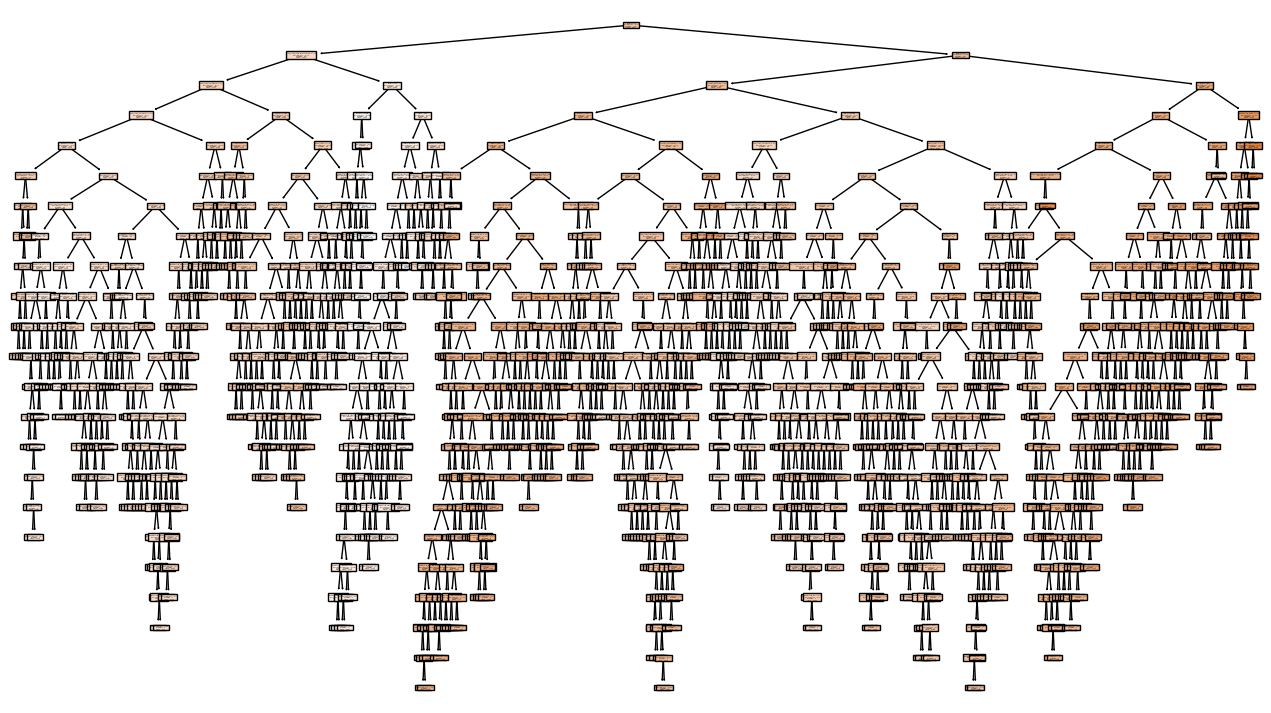

In [399]:
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=train.columns)

In [400]:
path = reg.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas

In [401]:
alphalist = []
for alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=0,ccp_alpha=alpha)
    reg.fit(X_train,y_train)
    alphalist.append(reg)

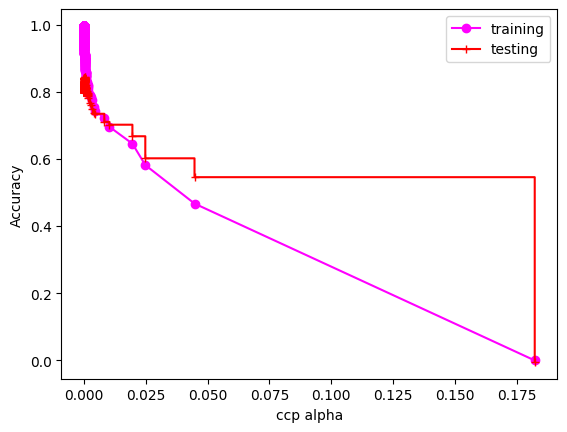

In [402]:
train_score = [reg.score(X_train,y_train) for reg in alphalist]
test_score = [reg.score(X_test,y_test) for reg in alphalist]

plt.xlabel('ccp alpha')
plt.ylabel('Accuracy')

plt.plot(ccp_alphas,train_score,marker = 'o',
        label = 'training',color = 'magenta')
plt.plot(ccp_alphas,test_score,marker = '+',
         label = 'testing',color = 'red',drawstyle = 'steps-post')
plt.legend()
plt.show()

**possible values of alpha can lie between `[0.0025-->0.0075]`**

[Text(0.5, 0.9, 'RAM <= 7.0\nsquared_error = 0.39\nsamples = 1106\nvalue = 6.846'),
 Text(0.25, 0.7, 'CPU_name_Other Intel Processor <= 0.5\nsquared_error = 0.192\nsamples = 362\nvalue = 6.234'),
 Text(0.125, 0.5, 'squared_error = 0.13\nsamples = 256\nvalue = 6.411'),
 Text(0.375, 0.5, 'squared_error = 0.084\nsamples = 106\nvalue = 5.806'),
 Text(0.75, 0.7, 'RAM <= 14.0\nsquared_error = 0.215\nsamples = 744\nvalue = 7.143'),
 Text(0.625, 0.5, 'TypeName_Notebook <= 0.5\nsquared_error = 0.159\nsamples = 553\nvalue = 6.992'),
 Text(0.5, 0.3, 'squared_error = 0.107\nsamples = 268\nvalue = 7.196'),
 Text(0.75, 0.3, 'PPI <= 114.881\nsquared_error = 0.131\nsamples = 285\nvalue = 6.8'),
 Text(0.625, 0.1, 'squared_error = 0.072\nsamples = 59\nvalue = 6.408'),
 Text(0.875, 0.1, 'squared_error = 0.096\nsamples = 226\nvalue = 6.902'),
 Text(0.875, 0.5, 'squared_error = 0.12\nsamples = 191\nvalue = 7.582')]

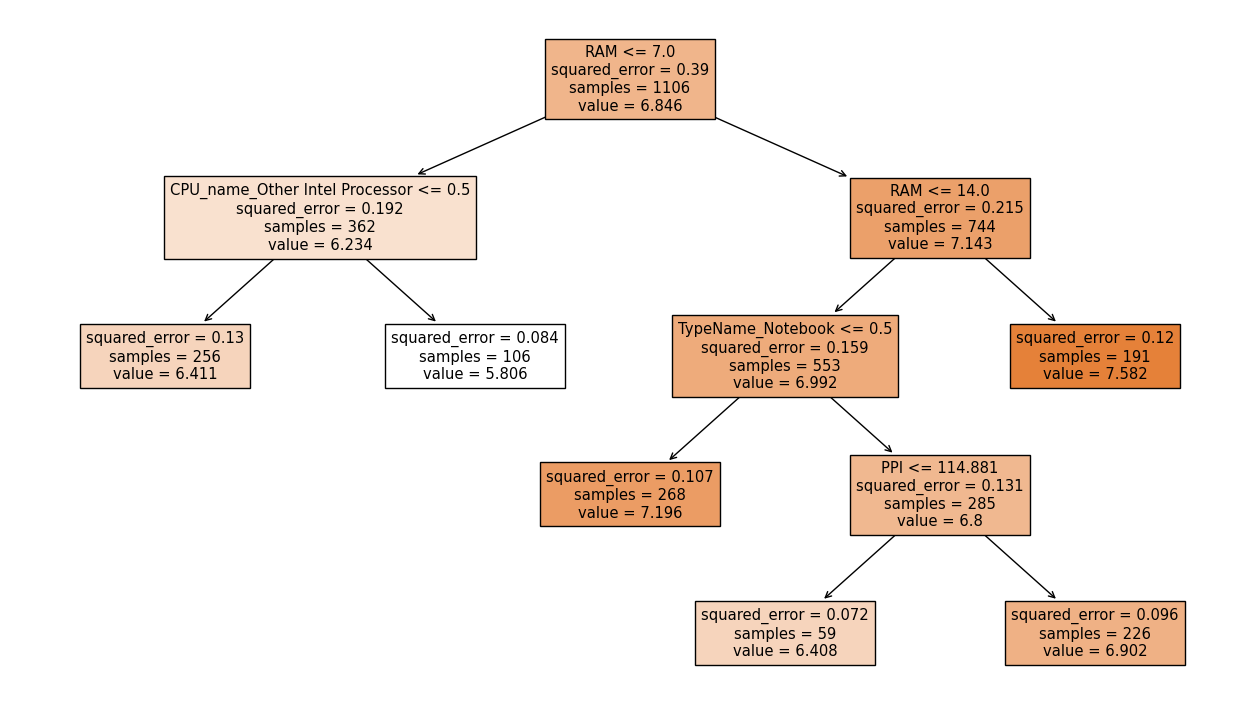

In [403]:
reg = DecisionTreeRegressor(random_state=0,ccp_alpha=0.0085)
reg.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=train.columns)

In [404]:
params=  {
    
    'RandomForest':{
        'model' : RandomForestRegressor(),
        'params':{
            'n_estimators':[int(x) for x in np.linspace(100,1200,10)],
            'criterion':["mse", "mae"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    },
    'Decision Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'criterion':["mse", "mae"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    }
}

In [405]:
scores = []
for modelname,mp in params.items():
    clf = RandomizedSearchCV(mp['model'],
                            param_distributions=mp['params'],cv = 6,
                            n_iter=10,scoring='neg_mean_squared_error',verbose=2)
    clf.fit(X_train,y_train)
    scores.append({
        'model_name':modelname,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_,
    })

Fitting 6 folds for each of 10 candidates, totalling 60 fits


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=10, n_estimators=344; total time=   0.6s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=10, n_estimators=344; total time=   0.7s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=10, n_estimators=344; total time=   0.7s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=10, n_estimators=344; total time=   0.7s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=10, n_estimators=344; total time=   0.7s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=10, n_estimators=344; total time=   0.6s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=10, n_estimators=466; total time=   9.9s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=10, n_estimators=466; total time=   9.4s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=10, n_estimators=466; total time=   9.4s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=10, n_estimators=466; total time=   9.4s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=10, n_estimators=466; total time=   9.7s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=10, n_estimators=466; total time=   8.6s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=1077; total time=   1.7s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=1077; total time=   1.7s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=1077; total time=   1.6s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=1077; total time=   1.5s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=1077; total time=   1.7s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=1077; total time=   1.6s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=14, n_estimators=1077; total time=   3.0s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=14, n_estimators=1077; total time=   2.8s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=14, n_estimators=1077; total time=   2.9s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=14, n_estimators=1077; total time=   2.6s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=14, n_estimators=1077; total time=   3.1s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=14, n_estimators=1077; total time=   2.7s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.01, criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=14, n_estimators=222; total time=   0.2s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.01, criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=14, n_estimators=222; total time=   0.2s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.01, criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=14, n_estimators=222; total time=   0.2s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.01, criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=14, n_estimators=222; total time=   0.2s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.01, criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=14, n_estimators=222; total time=   0.2s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.01, criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=14, n_estimators=222; total time=   0.2s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=588; total time=   0.7s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=588; total time=   0.8s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=588; total time=   0.7s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=588; total time=   0.9s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=588; total time=   0.9s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=588; total time=   0.8s
[CV] END ccp_alpha=0.0125, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0125, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END ccp_alpha=0.0125, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0125, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0125, criterion=mse, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=222; total time=   1.6s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=222; total time=   1.8s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=222; total time=   1.7s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=222; total time=   1.6s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=222; total time=   1.9s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=222; total time=   1.6s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=14, min_samples_split=5, n_estimators=833; total time=   1.1s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=14, min_samples_split=5, n_estimators=833; total time=   1.1s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=14, min_samples_split=5, n_estimators=833; total time=   1.1s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=14, min_samples_split=5, n_estimators=833; total time=   1.3s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=14, min_samples_split=5, n_estimators=833; total time=   1.2s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0075, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=14, min_samples_split=5, n_estimators=833; total time=   1.2s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=22, max_features=sqrt, min_samples_leaf=10, min_samples_split=14, n_estimators=1077; total time=   6.1s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=22, max_features=sqrt, min_samples_leaf=10, min_samples_split=14, n_estimators=1077; total time=   6.0s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=22, max_features=sqrt, min_samples_leaf=10, min_samples_split=14, n_estimators=1077; total time=   6.4s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=22, max_features=sqrt, min_samples_leaf=10, min_samples_split=14, n_estimators=1077; total time=   6.2s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=22, max_features=sqrt, min_samples_leaf=10, min_samples_split=14, n_estimators=1077; total time=   6.3s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=22, max_features=sqrt, min_samples_leaf=10, min_samples_split=14, n_estimators=1077; total time=   6.6s


D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Fitting 6 folds for each of 10 candidates, totalling 60 fits
[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=22, max_features=log2, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=22, max_features=log2, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=22, max_features=log2, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=22, max_features=log2, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=22, max_features=log2, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=22, max_features=log2, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10; total ti

D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\Python\Laptop_Pri

[CV] END ccp_alpha=0.005, criterion=mse, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mse, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=mse, max_dep

D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
D:\Python\Laptop_Pri

In [406]:
scores_df = pd.DataFrame(scores,columns=['model_name','best_score','best_estimator'])
scores_df

,model_name,best_score,best_estimator
0,RandomForest,-0.080250,"(DecisionTreeRegressor(ccp_alpha=0.0025, max_d..."
1,Decision Tree,-0.125412,"DecisionTreeRegressor(ccp_alpha=0.0025, criter..."


In [407]:
scores

[{'model_name': 'RandomForest',
  'best_score': -0.08024991160158573,
  'best_estimator': RandomForestRegressor(ccp_alpha=0.0025, criterion='mse', max_depth=15,
                        max_features='log2', min_samples_leaf=5,
                        min_samples_split=10, n_estimators=588)},
 {'model_name': 'Decision Tree',
  'best_score': -0.12541169711141142,
  'best_estimator': DecisionTreeRegressor(ccp_alpha=0.0025, criterion='mse', max_depth=22,
                        max_features='log2', min_samples_leaf=2,
                        min_samples_split=10)}]

In [408]:

#not a good prediction function
rf = RandomForestRegressor(ccp_alpha=0.0025, max_depth=22, min_samples_leaf=14,
                        min_samples_split=5, n_estimators=1200)

rf.fit(X_train,y_train)
ypred = rf.predict(X_test)
print(metrics.r2_score(y_test,y_pred))

0.8826652312007328


In [409]:
rf = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

rf.fit(X_train,y_train)
print(f'R2 score : {metrics.r2_score(y_test,rf.predict(X_test))}')

R2 score : 0.8862663142787666


## Prediction on the whole Dataset

In [410]:
predicted = []
testtrain = np.array(train)
for i in range(len(testtrain)):
    predicted.append(rf.predict([testtrain[i]]))
    
predicted

D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Py

D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Py

D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Py

D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Py

D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Py

D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Py

D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Py

D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Py

D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Py

D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Py

D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Py

D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Py

D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Py

D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Py

D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Py

D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Py

D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Py

D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Py

D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Py

D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Py

D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Py

D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Py

D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Py

D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Python\Laptop_Price_Predictor\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\Py

[array([7.22536941]),
 array([6.90659951]),
 array([6.62810096]),
 array([7.83554873]),
 array([7.3394333]),
 array([5.93245971]),
 array([7.48959787]),
 array([6.90659951]),
 array([7.45948529]),
 array([6.81062381]),
 array([6.27713198]),
 array([5.98698389]),
 array([7.76743511]),
 array([6.292752]),
 array([7.20276637]),
 array([7.3394333]),
 array([6.76589942]),
 array([7.83554873]),
 array([6.34112448]),
 array([7.06133823]),
 array([5.54763816]),
 array([6.91873303]),
 array([5.75002304]),
 array([6.83714111]),
 array([6.85992358]),
 array([6.10879656]),
 array([6.9412701]),
 array([6.70683684]),
 array([7.17944778]),
 array([6.80166933]),
 array([5.66329231]),
 array([5.96634641]),
 array([6.18084609]),
 array([7.66569782]),
 array([6.9412701]),
 array([5.63636909]),
 array([5.96007968]),
 array([6.8966395]),
 array([6.37122487]),
 array([6.802604]),
 array([6.03914274]),
 array([7.30931721]),
 array([6.39690471]),
 array([6.57471954]),
 array([6.94912048]),
 array([7.3394333])

In [411]:
# as we transformed our price variable to np.log
# we have to retranform it from np.log-->np.exp inorder to get the result

ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [412]:
df['Predicted Price'] = np.array(ans)
df

,Manufacturer,TypeName,RAM,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,GPU brand,Predicted Price
0,Apple,Ultrabook,8,Mac,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel,1373.846029
1,Apple,Ultrabook,8,Mac,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel,998.844901
2,HP,Notebook,8,Other,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel,756.045048
3,Apple,Ultrabook,16,Mac,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD,2528.922836
4,Apple,Ultrabook,8,Mac,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel,1539.839246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80,638.00,1,1,157.350512,Intel Core i7,0,128,Intel,677.496617
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30,1499.00,1,1,276.053530,Intel Core i7,0,512,Intel,1620.299376
1300,Lenovo,Notebook,2,Windows,1.50,229.00,0,0,111.935204,Other Intel Processor,0,0,Intel,243.593870
1301,HP,Notebook,6,Windows,2.19,764.00,0,0,100.454670,Intel Core i7,1000,0,AMD,698.728975


C:\Users\PREDATOR\AppData\Local\Temp\ipykernel_19652\3017401038.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df['Price'],hist=False,color='orange',label='Actual')
C:\Users\PREDATOR\AppData\Local\Temp\ipykernel_19652\3017401038.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.dis

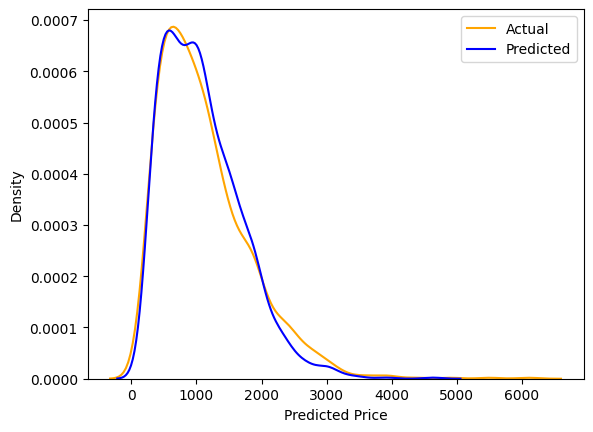

In [413]:
sn.distplot(df['Price'],hist=False,color='orange',label='Actual')
sn.distplot(df['Predicted Price'],hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

In [414]:
import pickle
file = open('laptoppricepredictor.pkl','wb')
pickle.dump(rf,file)
file.close()

In [415]:
X_train.iloc[0]

RAM                                 8.00000
Weight                              2.00000
TouchScreen                         0.00000
IPS                                 0.00000
PPI                               100.45467
HDD                                 0.00000
SSD                               128.00000
Manufacturer_Apple                  0.00000
Manufacturer_Asus                   0.00000
Manufacturer_Chuwi                  0.00000
Manufacturer_Dell                   0.00000
Manufacturer_Fujitsu                0.00000
Manufacturer_Google                 0.00000
Manufacturer_HP                     0.00000
Manufacturer_Huawei                 0.00000
Manufacturer_LG                     0.00000
Manufacturer_Lenovo                 0.00000
Manufacturer_MSI                    0.00000
Manufacturer_Mediacom               0.00000
Manufacturer_Microsoft              0.00000
Manufacturer_Razer                  0.00000
Manufacturer_Samsung                0.00000
Manufacturer_Toshiba            